In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML;

# Distances and Timeseries

Today we will start building some tools for making comparisons of data objects, with particular attention to timeseries.

Working with data, we can encounter a wide variety of different data objects:

* Records of users
* Graphs
* Images
* Videos
* Text (webpages, books)
* Strings (DNA sequences)
* Timeseries
* ...

How can we compare them?

## Feature space representation

Usually a data object consists of a set of attributes.

These are also commonly called __features.__

* ("J. Smith", 25, \$ 200,000)
* ("M. Jones", 47, \$ 45,000)

If all $d$ dimensions are real-valued then we can visualize each data object as a point in a $d$-dimensional vector space.
 
* (25, USD 200,000) $\rightarrow \mat{{c}25\\200000}$.

Likewise If all features are binary then we can think of each data object as a binary vector in vector space.

The space is called __feature space.__

We then are naturally interested in how __similar__ or __dissimilar__ two objects are.

A dissimilarity function takes two objects as input, and returns a large value when then two objects are not very similar.

Often we put restrictions on the dissimilarity function.

One of the most common is that it be a __metric.__

The dissimilarity $d(x, y)$ between two objects $x$ and $y$ is a
__metric__ if

* $d(i, j) = 0 \leftrightarrow i == j\;\;\;\;\;\;\;\;$ (identity of indiscernables)
* $d(i, j) = d(j, i)\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (symmetry)
* $d(i, j) \leq d(i, h)+d(h, j)\;\;$ (triangle inequality)

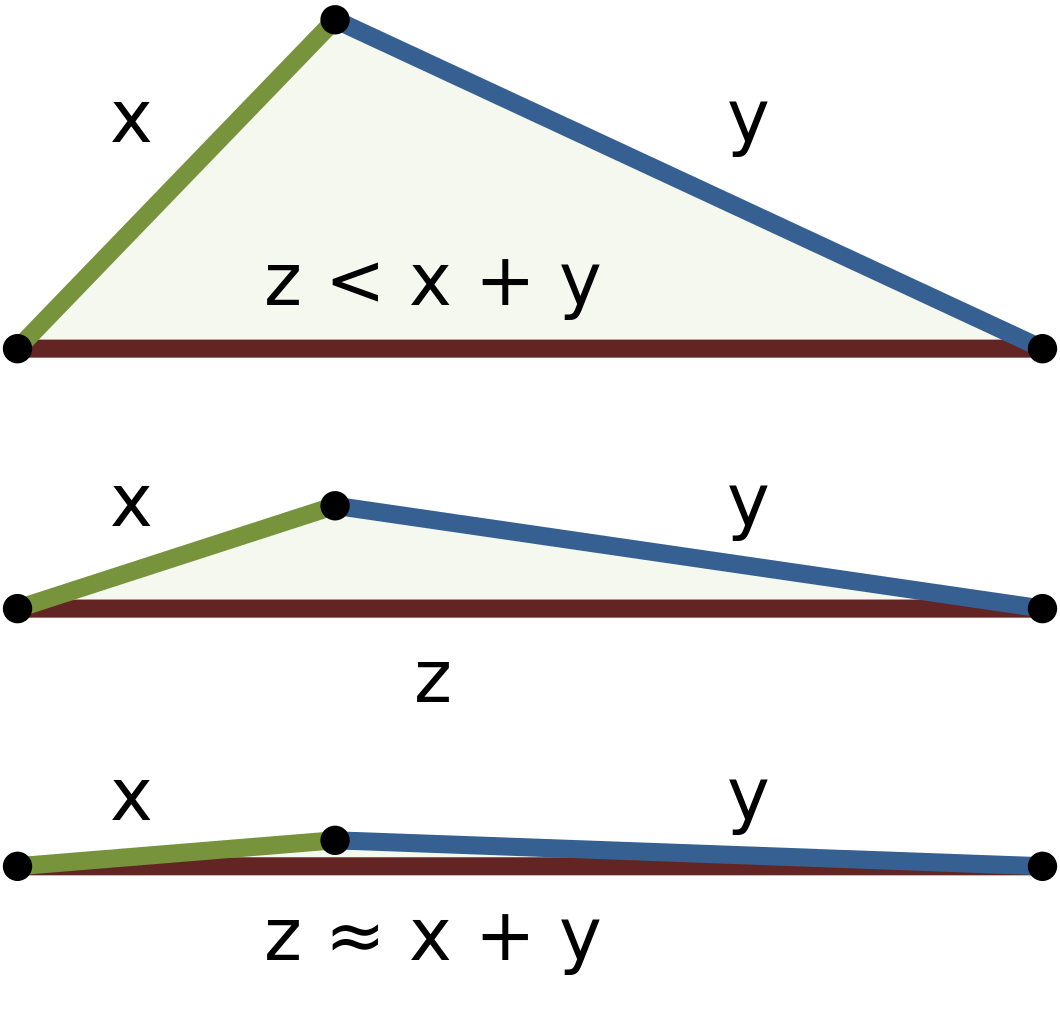

In [2]:
display(Image("figs/TriangleInequality.png", width=350))

By WhiteTimberwolf, Brews ohare (PNG version) - PNG version, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=26047092

A metric is also commonly called a __distance__.

Sometimes we will use "distance" informally, ie, to refer to a dissimilarity function even if we are not sure it is a metric.   

We'll try to say "dissimilarity" in those cases though.

Why is it important or valuable for a dissimilarity to be a metric?

The additional constraints allow us to reason about and more easily visualize the data.

The main way this happens is through the triangle inequality.   

The triangle inequality basically says, if two objects are "close" to another object, then they are "close" to each other.  

This is not always the case for real data, but when it is true, it can really help.

Definitions of distance or dissimilarity functions are usually
diferent for real, boolean, categorical, and ordinal
variables.

Weights may be associated with diferent variables
based on applications and data semantics.

## Matrix representation

Very often we will manage data conveniently in matrix form.

The standard way of doing this is:

$$ \mbox{$m$ data objects}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}x_{11}\\\vdots\\x_{i1}\\\vdots\\x_{m1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1j}\\\vdots\\x_{ij}\\\vdots\\x_{mj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1n}\\\vdots\\x_{in}\\\vdots\\x_{mn}\end{array}
\end{array}\right]}^{\mbox{$n$ features}} $$

Where we typically use symbols $m$ for number of rows (objects) and $n$ for number of columns (features).


When we are working with distances, the matrix representation is:

$$ \mbox{$m$ data objects}\left\{\begin{array}{c}\;\\\;\\\;\\\;\end{array}\right.\;\;
\overbrace{\left[\begin{array}{cccc}
\begin{array}{c}0\\d(1,2)\\d(1,3)\\\vdots\\d(1,m)\end{array} &
\begin{array}{c}\;\\0\\d(2,3)\\\vdots\\d(2,m)\end{array} &
\begin{array}{c}\;\\\;\\\ddots\\\vdots\\\dots\end{array} &
\begin{array}{c}\;\\\;\\\;\\\;\\0\end{array} \\
\end{array}\right]}^{\mbox{$m$ data objects}} $$


## Norms

Assume some function $p(\vv)$ which measures the "size" of the vector $\vv$.

$p()$ is called a __norm__ if:

* $p(a\vv) = |a|\; p(\vv)\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ (absolute scaling)
* $p(\vu + \vv) \leq p(\vu) + p(\vv)\;\;\;\;\;\;\;\;\;\;$  (subadditivity)
* $p(\vv) = 0 \leftrightarrow \vv$ is the zero vector $\;\;\;\;$(separates points)

Norms are important for this reason, among others:
    
__Every norm defines a corresponding metric.__

That is, if $p()$ is a norm, then $d(\vx, \vy) = p(\vx-\vy)$ is a metric.

## Useful Norms

__$\ell_p$__ Norm, where $p \geq 1.$

Defines the _Minkowski distance._

$$ L_p(\vx, \vy) = \left(\sum_{i=1}^d |x_i - y_i|^p\right)^{\frac{1}{p}} $$

A special case of this isthe $\ell_2$ norm that we've already studied, which defines the __Euclidean__ norm.

It is equal to the euclidean distance between the vectors.

$$ L_2(\vx, \vy) = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}$$

Another important special case is the $\ell_1$ norm.

This defines the __Manhattan__ distance, or (for binary vectors), the __Hamming__ distance:

$$ L_1(\vx, \vy) = \sum_{i=1} |x_i - y_i| $$

If we take the limit of the $\ell_p$ norm as $p$ gets large ($\lim_{p\rightarrow \infty}L_p$) we get the $\ell_\infty$ norm.  

The value of the $\ell_\infty$ norm is simply the __largest element__ in a vector.

What is the metric that this norm induces?

Another related idea is the $\ell_0$ "norm," which is not a norm, but is in a sense what we get from the $p$-norm for $p = 0$.

Note that this is __not__ a norm, but it gets called that anyway.   

This "norm" simply counts the number of __nonzero__ elements in a vector.

This is called the vector's __sparsity.__

Here is the notion of a "circle" under each of three norms.

That is, for each norm, the set of vectors having norm 1, or distance 1 from the origin.

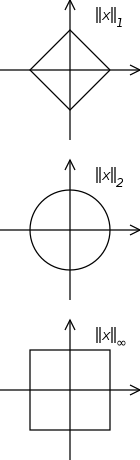

In [3]:
display(Image("figs/L5-Vector-Norms.png", width=150))

<a href="http://creativecommons.org/licenses/by-sa/3.0/" title="Creative Commons Attribution-Share Alike 3.0">CC BY-SA 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=678101">https://commons.wikimedia.org/w/index.php?curid=678101</a>

## Similarity and Dissimilarity

We've already seen that the inner product of two vectors can be used to compute the __cosine of the angle__ between them:

$$ \cos(\vx, \vy) = \frac{\vx^T\vy}{\Vert\vx\Vert \Vert\vy\Vert} $$

Note that this value is __large__ when $\vx \approx \vy.$  So it is a __similarity__ function.

We often find that we have a similarity function and need to convert it to a dissimilarity function.   Two straightforward ways of doing that are:

$$d(x,y) = 1/s(x,y)$$

$$d(x,y) = k - s(x,y)$$

For some properly chosen $k$.

For cosine similarity, one often uses:
    
$$ d(\vx, \vy) = 1 - \cos(\vx, \vy)$$

Note however that this is __not a metric!__

However if we recover the actual angle beween $\vx$ and $\vy$, that is a metric.

## Bit vectors and Sets

When working with bit vectors, the $\ell_1$ metric is commonly used and is called the __Hamming__ distance.

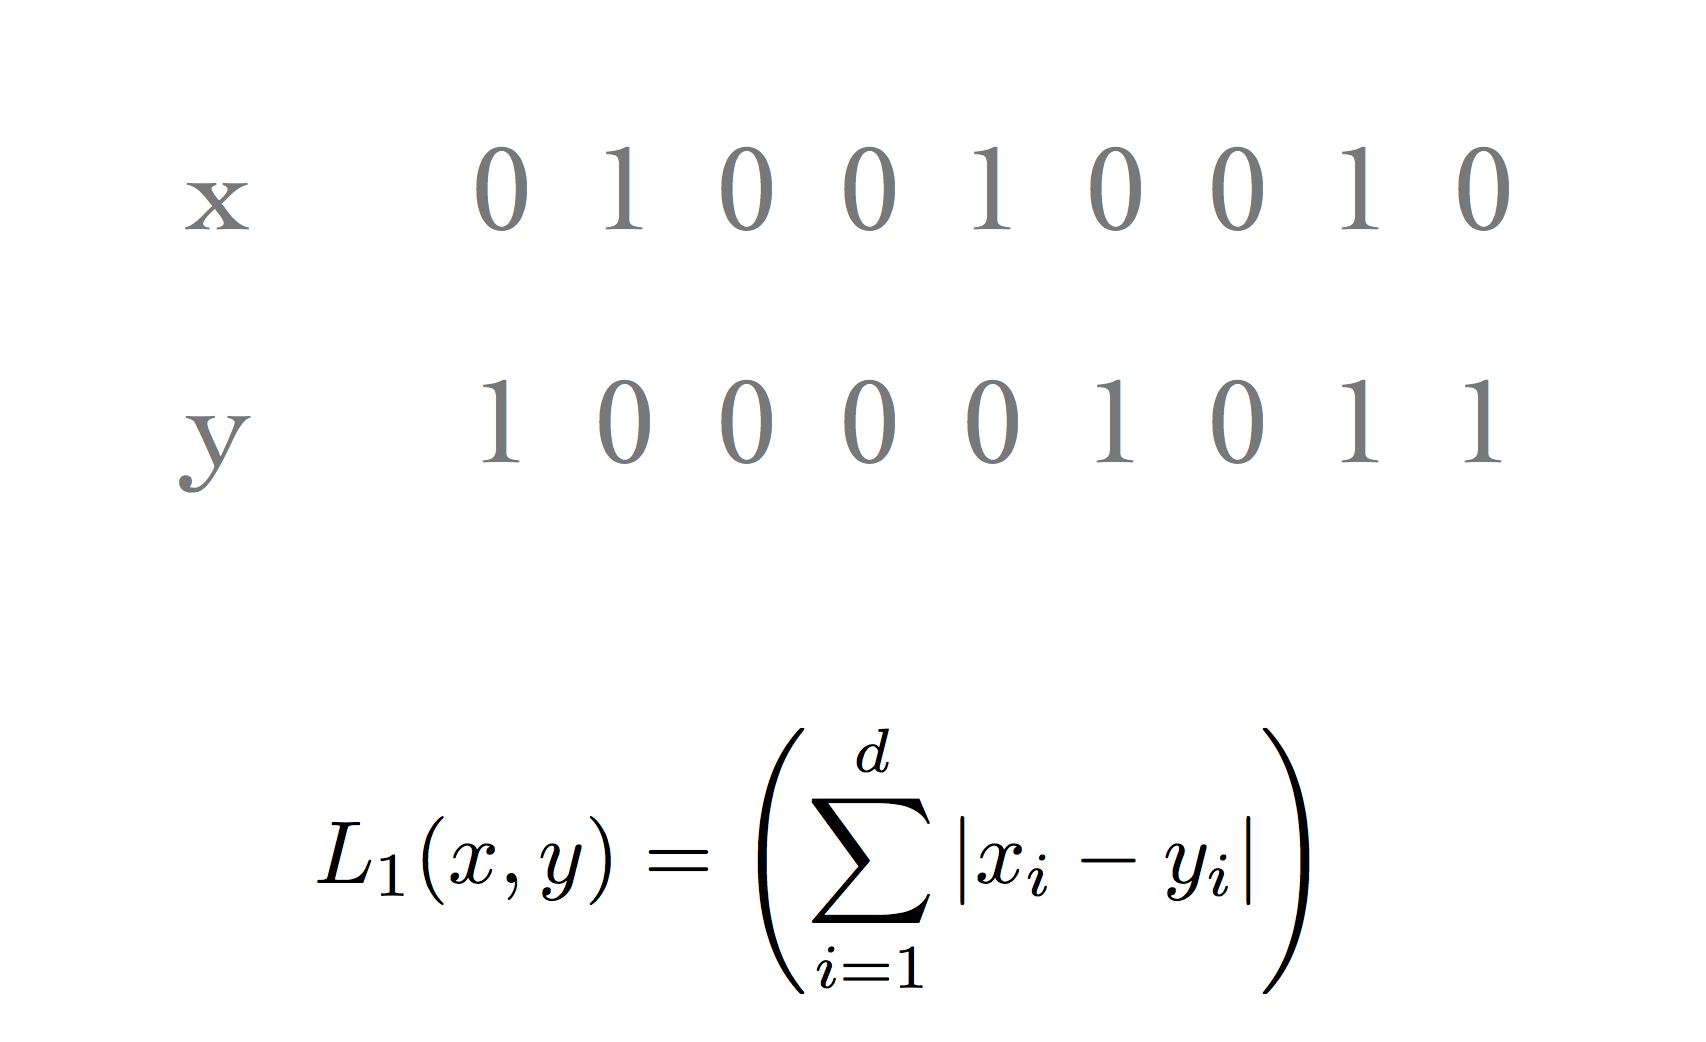

In [4]:
display(Image("figs/L5-hamming-1.png", width=550))

This has a natural interpretation: "how well do the two vectors match?"

Or: "What is the smallest number of bit flips that will convert one vector into the other?"

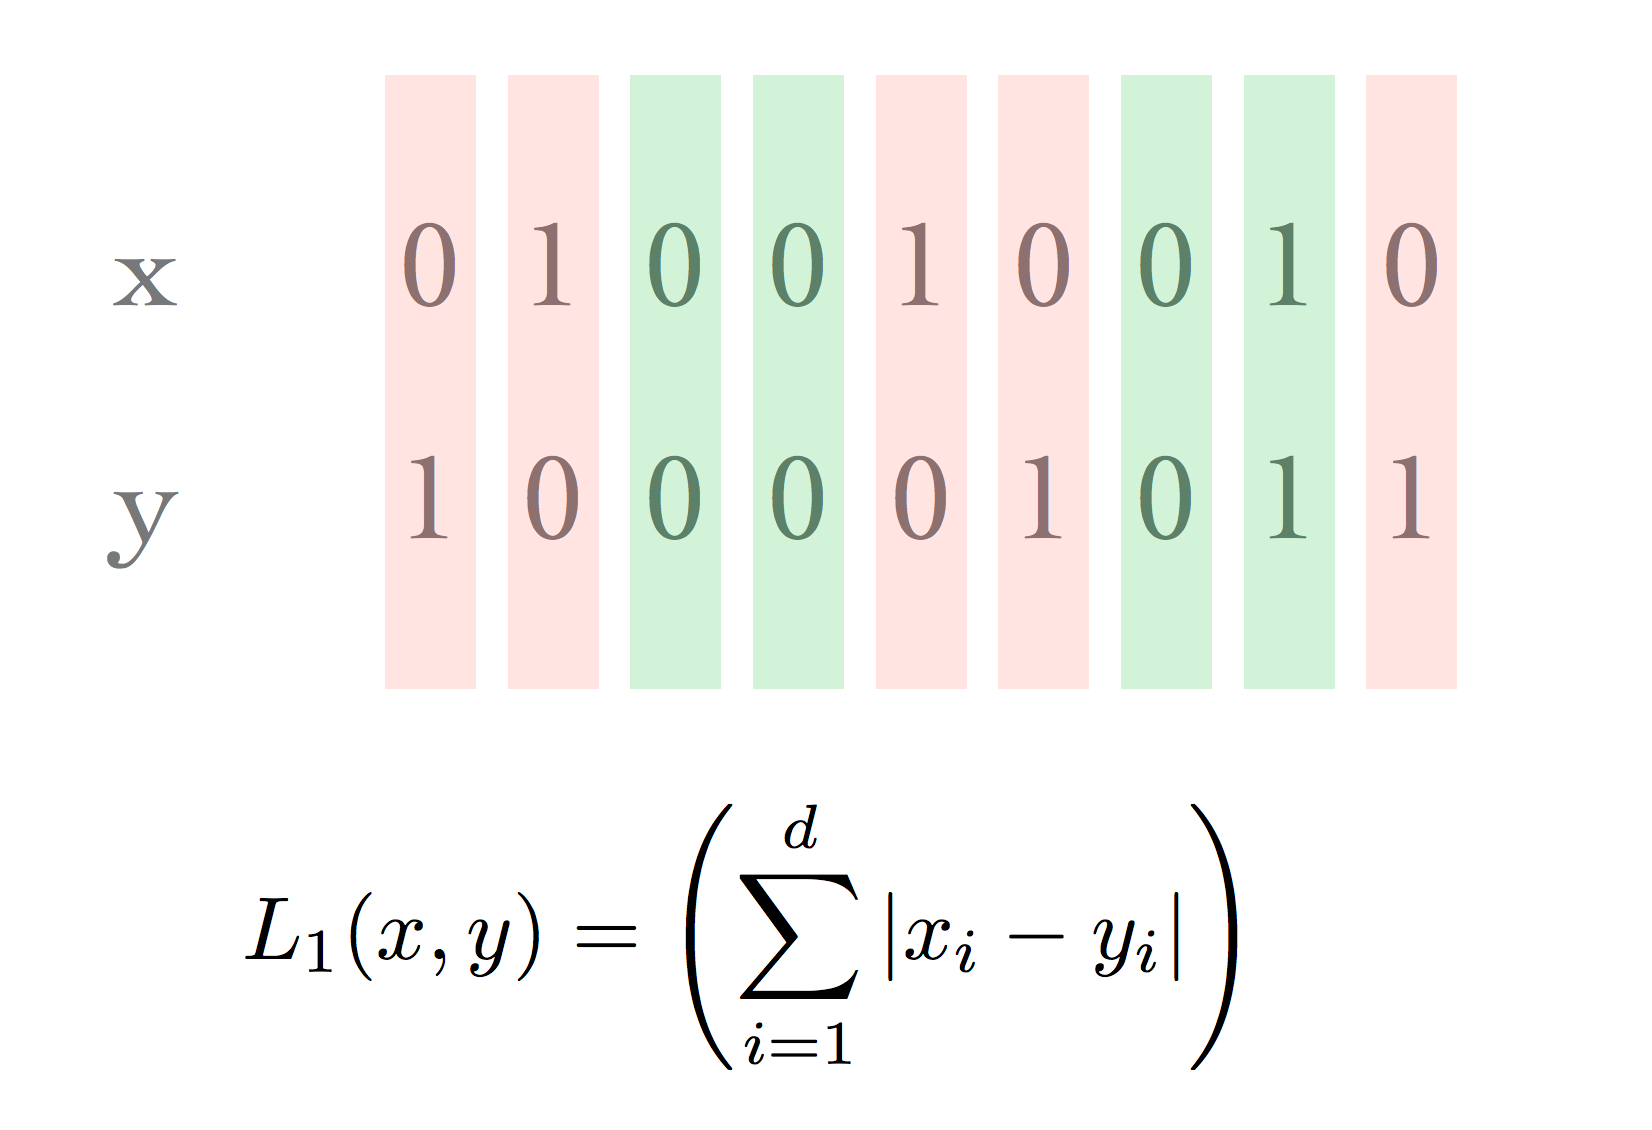

In [5]:
display(Image("figs/L5-hamming-2.png", width=550))

In other cases, the Hamming distance is not a very appropriate metric.

Consider the case in which the bit vector is being used to represent a set.

In that case, Hamming distance measures the __size of the set difference.__

For example, consider two documents.   We will use bit vectors to represent the sets of words in each document.

* Case 1: both documents are large, almost identical, but differ in 10 words.
* Case 2: both documents are small, disjoint, have 5 words each.

The situation can be represented as this:

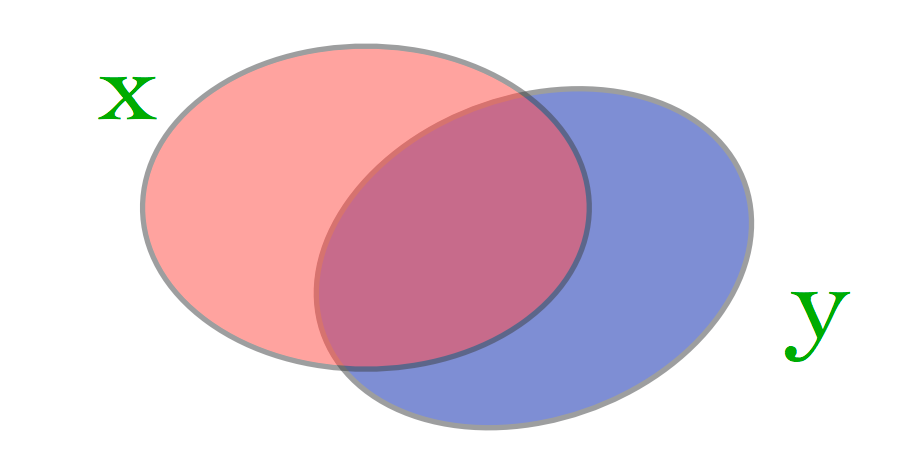

In [6]:
display(Image("figs/L5-jaccard-1.png", width=550))

What matters is not just the size of the set difference, but the size of the intersection as well.

This leads to the _Jaccard_ similarity:

$$J_{Sim}(\vx, \vy) = \frac{|\vx \cap \vy|}{|\vx \cup \vy|}$$

This takes on values from 0 to 1, so a natural dissimilarity metric is $1 - J_{Sim}().$

In fact, this is a __metric!__:

$$J_{Dist}(\vx, \vy) = 1- \frac{|\vx \cap \vy|}{|\vx \cup \vy|}$$

Consider our two cases:
    
Case 1: (very large almost identical documents)

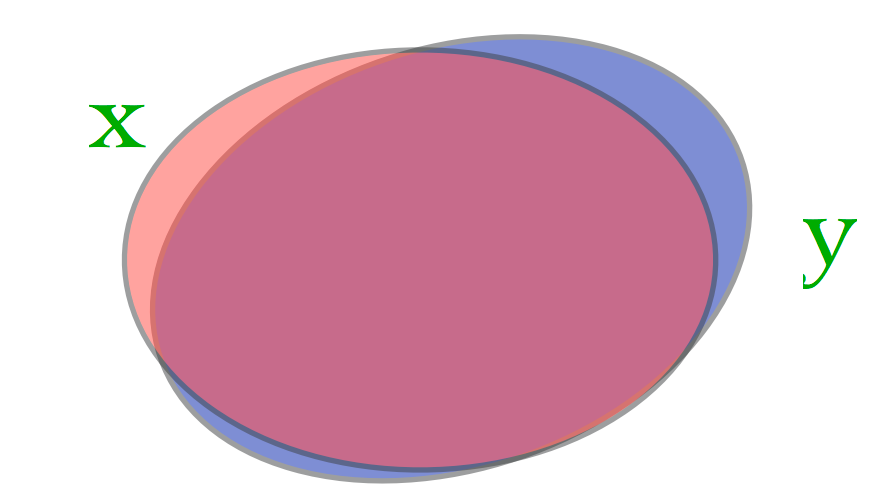

In [7]:
display(Image("figs/L5-jaccard-2.png", width=550))

Here $J_{Sim}(\vx, \vy)$ is almost 1.

Case 2: (small disjoint documents)

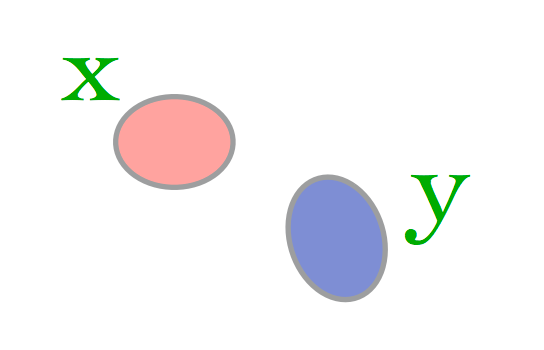

In [8]:
display(Image("figs/L5-jaccard-3.png", width=550))

Here $J_{Sim}(\vx, \vy)$ is 0.

## Time Series

A time series is a sequence of real numbers, representing the measurements of a real variable at (equal) time intervals.

* Stock prices
* Volume of sales over time
* Daily temperature readings

A time series database is a large collection of time series.

## Similarity of Time Series

How should we measure the "similarity" of two timeseries?

We will assume they are the same length.

Examples:

* Find companies with similar stock price movements over a time interval
* Find similar DNA sequences
* Find users with similar credit usage patterns



Two Problems:

1. Defining a meaningful similarity (or distance) function.
2. Finding an efficient algorithm to compute it.


## Norm-based Similarity Measures

We could just view each sequence as a vector.

Then we could use a $p$-norm, eg $\ell_1, \ell_2,$ or $\ell_p$ to measure similarity.

Advantages:
    
1. Easy to compute - linear in the length of the time series (O(n)).
2. It is a metric.

Disadvantage:

1. May not be __meaningful!__

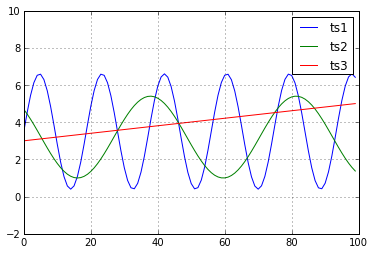

In [10]:
display(Image("figs/L5-ts-euclidean.png", width=550))

It is clear that ts1 and ts2 are "more similar."   

However, according to Euclidean distance: d(ts1, ts2) = 26.9, while d(ts1, ts3) = 23.2.

Not good!

## Feature Engineering

In general, there may be different aspects of a timeseries that are important in different settings.

The first step therefore is to ask yourself "what is important about timeseries in my application?"


This is an example of __feature engineering.__

Namely, the art of computing some derived measure from your data object that makes its important properties usable in a subsequent step.

A reasonable approach may then to be:
    
* extract the relevant features
* use a simple method (eg, a norm) to define similarity over those features.


In the case above, one might think of using 

* Fourier coefficients (to capture periodicity)
* Histograms
* Or something else!

## Dynamic Time Warping

One case that arises often is something like the following:  "bump hunting"



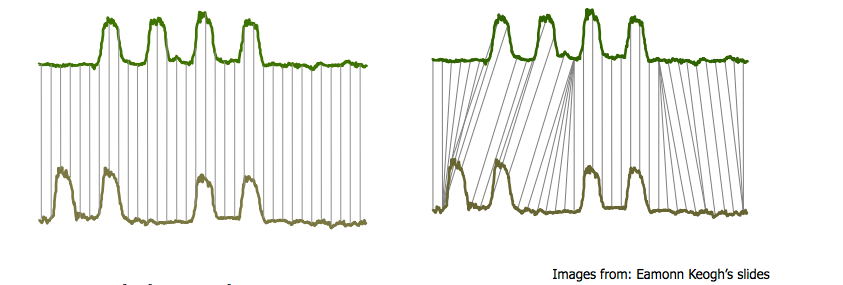

In [11]:
display(Image("figs/L5-DTW-1.png", width=550))

Both timeseries have the same key characteristics: four bumps.

But a one-one match (ala Euclidean distance) will not detect this.

A solution to this is called __dynamic time warping.__

The basic idea is to allow acceleration or deceleration of signals along the time dimension.

Classic applications:
    
* Speech recognition
* Signature recognition

Specifically: 

* Consider $X = x_1, x_2, \dots, x_n$ and $Y = y_1, y_2, \dots, y_n$.
* We are allowed to extend each sequence by repeating elements to form $X'$ and $Y'$.
* We then calculate, eg, Euclidean distance between the extended sequnces $X'$ and $Y'$

There is a simple way to visualize this algorithm.

Consider a matrix $M$ where $M_{ij} = |x_i - y_j|$ (or some other error measure).

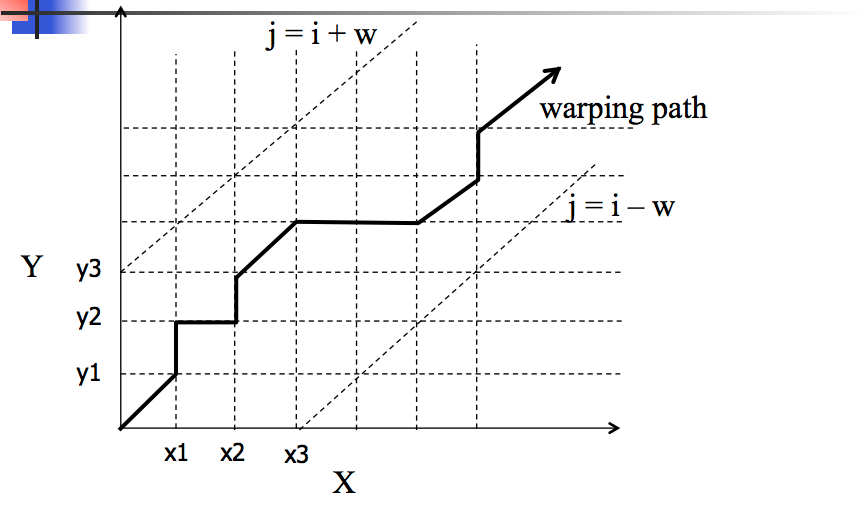

In [12]:
display(Image("figs/L5-DTW-2.png", width=550))

$M$ measures the amount of error we get if we match $x_i$ with $y_j$. 

So we seek a __path through $M$ that minimizes the total error.__

We need to start in the lower left and work our way up via a continuous path.

Basic restrictions on path:
    
* Montonicity
    * path should not go down or to the left
* Continuity
    * No elements may be skipped in sequence

This can be solved via dynamic programming.  However, the algorithm is still quadratic in $n$.

Hence, we may choose to put a restriction on the amount that the path can deviate from the diagonal.

The basic algorithm looks like this:

`D[0, 0] = 0
for i in range(n):
    for j in range (m):
        D[i,j] = M[i,j] + min( D[i-1, j],  # insertion
                               D[i, j-1],  # deletion
                               D[i-1, j-1]) # match`

Unfortunately, the algorithm is still quadratic in $n$ $(O(nm))$.

Hence, we may choose to put a restriction on the amount that the path can deviate from the diagonal.

This is implemented by not allowing the path to pass through locations where $|i - j| > w$.

Then the algorithm is $O(nw)$.

## A related notion

A closely related idea concerns strings.

(Strings are just sequences, like timeseries).

Given two strings, one way to define a 'distance' between them as the minimum number of edit operations that are needed to transform one string into the other.

Edit operations are insertion, deletion, and substitution of single characters.

This is called __edit distance__ or __Levenshtein distance.__

A very similar dynamic programming algorithm can be used to find this distance.

In bioinformatics this algorithm is called "Smith-Waterman" sequence alignment.